<a href="https://colab.research.google.com/github/RESHMAGB/Crime/blob/main/final_crime_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

# ML Libraries
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Evaluation Metrics
from yellowbrick.classifier import ClassificationReport
from sklearn import metrics

In [ ]:
df = pd.concat([pd.read_csv('/content/Chicago_Crimes_2001_to_2004 (1).csv', error_bad_lines=False),
                pd.read_csv('/content/Chicago_Crimes_2005_to_2007.csv', error_bad_lines=False)])

df.head()

<ipython-input-7-e267065a804f>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.concat([pd.read_csv('/content/Chicago_Crimes_2001_to_2004 (1).csv', error_bad_lines=False),
<ipython-input-7-e267065a804f>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  pd.read_csv('/content/Chicago_Crimes_2005_to_2007.csv', error_bad_lines=False)])
<ipython-input-7-e267065a804f>:2: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv('/content/Chicago_Crimes_2005_to_2007.csv', error_bad_lines=False)])


,"\n3581186,1360573,G064462,01/27/2001 01:30:00 AM,076XX S YATES BL,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,False,False,421,4.0,,,02,1193566.0,1854817.0,2001,08/17/2015 03:03:40 PM,41.756566447,-87.56617866,(41.756566447","-87.56617866)""",Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
"(3581187, 1360575, G064697, 01/31/2001 06:15:00 PM, 005XX W 71 ST, 1320, CRIMINAL DAMAGE, TO VEHICLE, STREET, False, False, 732, 7.0, nan, nan, 14, 1173729.0, 1857867.0, 2001, 08/17/2015 03:03:40 PM, 41.765398432)",-87.638787,"(41.765398432, -87.638786692)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(3581188, 1360576, G038589, 01/18/2001 08:10:00 PM, 074XX S STEWART AV, 2017, NARCOTICS, MANU/DELIVER:CRACK, RESIDENCE, True, False, 731, 7.0, nan, nan, 18, 1174956.0, 1855490.0, 2001, 08/17/2015 03:03:40 PM, 41.758848389)",-87.634360,"(41.758848389, -87.634360166)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(3581189, 1360577, G050784, 01/25/2001 03:05:00 AM, 016XX N PULASKI RD, 2027, NARCOTICS, POSS: CRACK, STREET, True, False, 2535, 25.0, nan, nan, 18, 1149505.0, 1910618.0, 2001, 08/17/2015 03:03:40 PM, 41.910656583)",-87.726209,"(41.910656583, -87.726209401)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(3581190, 1360578, G064707, 01/31/2001 03:15:00 PM, 071XX S WENTWORTH AV, 0620, BURGLARY, UNLAWFUL ENTRY, RESIDENCE, False, False, 731, 7.0, nan, nan, 05, 1176232.0, 1857765.0, 2001, 08/17/2015 03:03:40 PM, 41.765062705)",-87.629616,"(41.765062705, -87.629615517)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(3581191, 1360579, G066038, 01/14/2001 07:00:00 PM, 035XX N ALBANY AV, 1310, CRIMINAL DAMAGE, TO PROPERTY, RESIDENCE, False, False, 1733, 17.0, nan, nan, 14, 1155048.0, 1923551.0, 2001, 08/17/2015 03:03:40 PM, 41.94603627)",-87.705498,"(41.94603627, -87.705498457)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 309607 entries, 0 to 133894
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            309607 non-null  int64  
 1   ID                    309607 non-null  int64  
 2   Case Number           309607 non-null  object 
 3   Date                  309607 non-null  object 
 4   Block                 309606 non-null  object 
 5   IUCR                  309605 non-null  object 
 6   Primary Type          309605 non-null  object 
 7   Description           309605 non-null  object 
 8   Location Description  309603 non-null  object 
 9   Arrest                309605 non-null  object 
 10  Domestic              309605 non-null  object 
 11  Beat                  309605 non-null  float64
 12  District              309604 non-null  float64
 13  Ward                  137976 non-null  float64
 14  Community Area        137957 non-null  float64
 15  

In [ ]:
# Preprocessing
# Remove NaN Value (As Dataset is huge, the NaN row could be neglectable)
df = df.dropna()

In [ ]:
df = df.sample(n=100000)

In [ ]:
# Remove irrelevant/not meaningfull attributes
df = df.drop(['Unnamed: 0'], axis=1)
df = df.drop(['ID'], axis=1)
df = df.drop(['Case Number'], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 90504 to 1353
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Date                  100000 non-null  object 
 1   Block                 100000 non-null  object 
 2   IUCR                  100000 non-null  object 
 3   Primary Type          100000 non-null  object 
 4   Description           100000 non-null  object 
 5   Location Description  100000 non-null  object 
 6   Arrest                100000 non-null  object 
 7   Domestic              100000 non-null  object 
 8   Beat                  100000 non-null  float64
 9   District              100000 non-null  float64
 10  Ward                  100000 non-null  float64
 11  Community Area        100000 non-null  float64
 12  FBI Code              100000 non-null  object 
 13  X Coordinate          100000 non-null  float64
 14  Y Coordinate          100000 non-null  float64
 15

In [ ]:
# Splitting the Date to Day, Month, Year, Hour, Minute, Second
df['date2'] = pd.to_datetime(df['Date'])
df['Year'] = df['date2'].dt.year
df['Month'] = df['date2'].dt.month
df['Day'] = df['date2'].dt.day
df['Hour'] = df['date2'].dt.hour
df['Minute'] = df['date2'].dt.minute
df['Second'] = df['date2'].dt.second
df = df.drop(['Date'], axis=1)
df = df.drop(['date2'], axis=1)
df = df.drop(['Updated On'], axis=1)
df.head()

,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,...,Y Coordinate,Year,Latitude,Longitude,Location,Month,Day,Hour,Minute,Second
90504,076XX S SOUTH SHORE DR,1320,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT/GARAGE(NON.RESID.),False,False,421.0,4.0,7.0,...,1855401.0,2006,41.758091,-87.554612,"(41.758091299, -87.554611718)",6,18,12,3,43
19941,009XX W CUYLER AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,2322.0,19.0,46.0,...,1927091.0,2006,41.955449,-87.652583,"(41.955449226, -87.652583361)",4,22,23,0,0
61439,006XX S WASHTENAW AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,STREET,False,False,1135.0,11.0,2.0,...,1897176.0,2006,41.873592,-87.693647,"(41.873591709, -87.69364699)",5,25,15,0,0
80144,007XX N CICERO AVE,0620,BURGLARY,UNLAWFUL ENTRY,OTHER,False,False,1111.0,11.0,28.0,...,1904387.0,2006,41.893659,-87.745763,"(41.893658948, -87.745763169)",6,10,17,0,0
97911,002XX N KARLOV AVE,2024,NARCOTICS,POSS: HEROIN(WHITE),ALLEY,True,False,1114.0,11.0,28.0,...,1900922.0,2006,41.884059,-87.728220,"(41.884059039, -87.728220313)",4,2,16,11,17


In [ ]:
# Convert Categorical Attributes to Numerical
df['Block'] = pd.factorize(df["Block"])[0]
df['IUCR'] = pd.factorize(df["IUCR"])[0]
df['Description'] = pd.factorize(df["Description"])[0]
df['Location Description'] = pd.factorize(df["Location Description"])[0]
df['FBI Code'] = pd.factorize(df["FBI Code"])[0]
df['Location'] = pd.factorize(df["Location"])[0]

In [ ]:
Target = 'Primary Type'
print('Target: ', Target)

Target:  Primary Type


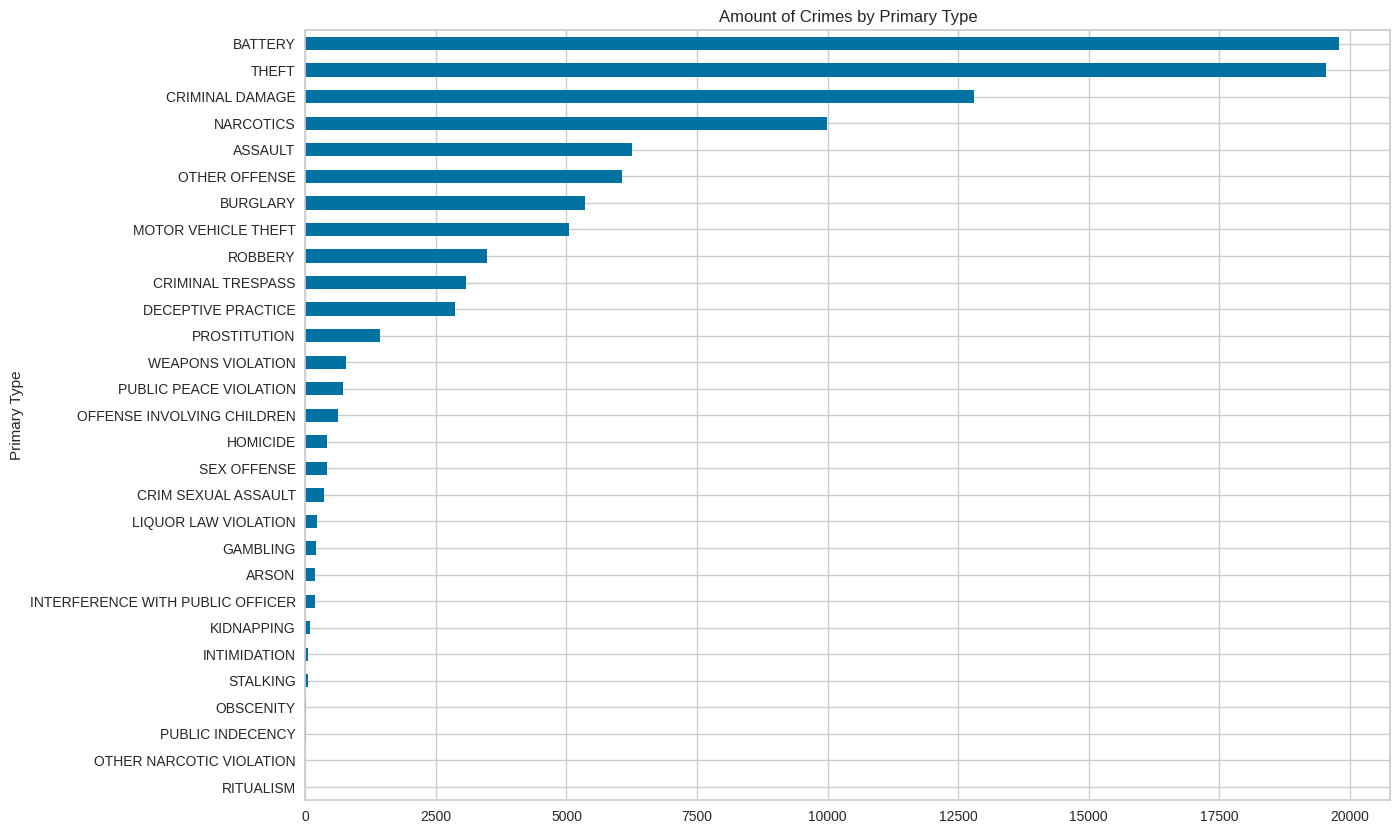

In [ ]:
# Plot Bar Chart visualize Primary Types
plt.figure(figsize=(14,10))
plt.title('Amount of Crimes by Primary Type')
plt.ylabel('Crime Type')
plt.xlabel('Amount of Crimes')

df.groupby([df['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')

plt.show()

In [ ]:
# At previous plot, we could see that the classes is quite imbalance
# Therefore, we are going to group several less occured Crime Type into 'Others' to reduce the Target Class amount

# First, we sum up the amount of Crime Type happened and select the last 13 classes
all_classes = df.groupby(['Primary Type'])['Block'].size().reset_index()
all_classes['Amt'] = all_classes['Block']
all_classes = all_classes.drop(['Block'], axis=1)
all_classes = all_classes.sort_values(['Amt'], ascending=[False])

unwanted_classes = all_classes.tail(13)
unwanted_classes

,Primary Type,Amt
25,SEX OFFENSE,417
4,CRIM SEXUAL ASSAULT,351
13,LIQUOR LAW VIOLATION,213
8,GAMBLING,201
0,ARSON,191
10,INTERFERENCE WITH PUBLIC OFFICER,186
12,KIDNAPPING,97
11,INTIMIDATION,56
26,STALKING,45
16,OBSCENITY,4


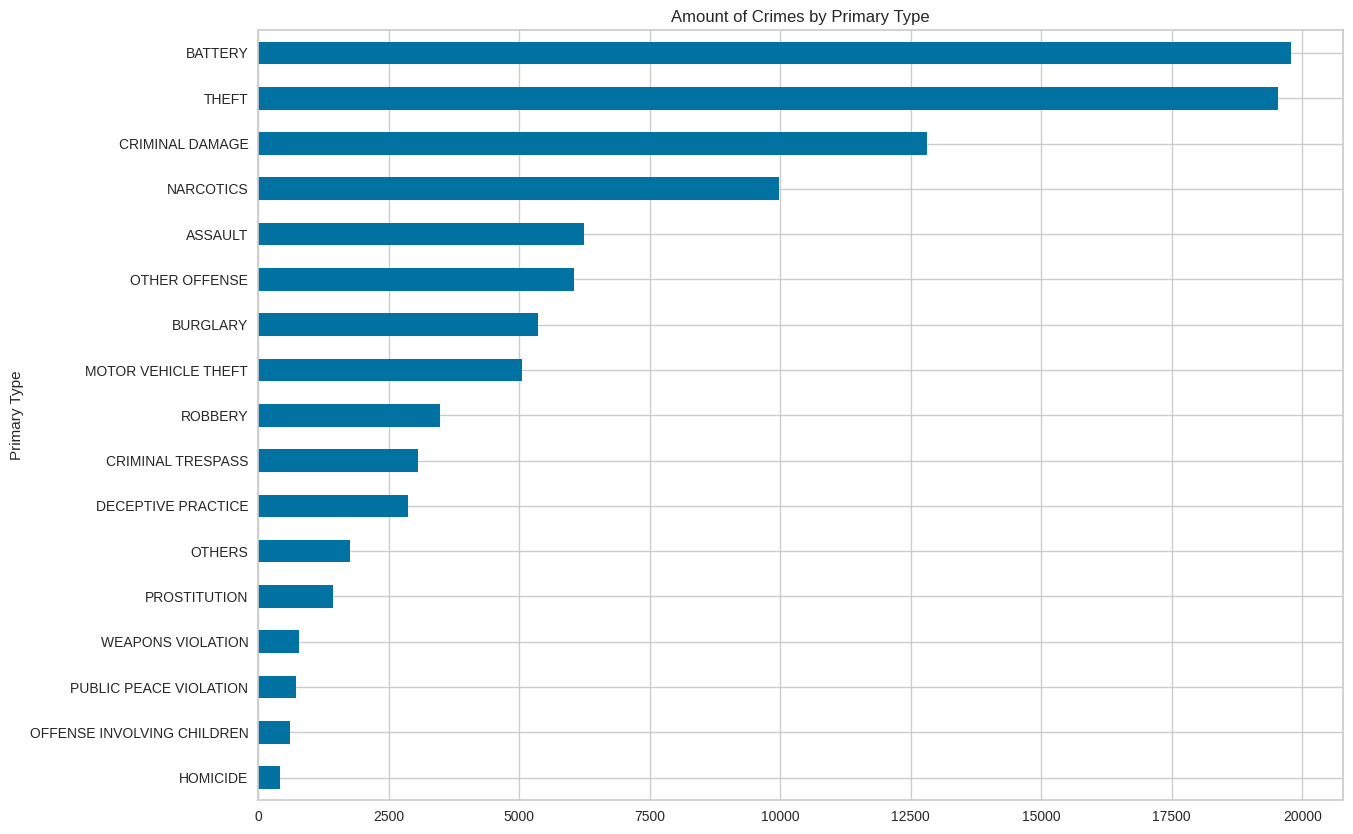

In [ ]:
# After that, we replaced it with label 'OTHERS'
df.loc[df['Primary Type'].isin(unwanted_classes['Primary Type']), 'Primary Type'] = 'OTHERS'

# Plot Bar Chart visualize Primary Types
plt.figure(figsize=(14,10))
plt.title('Amount of Crimes by Primary Type')
plt.ylabel('Crime Type')
plt.xlabel('Amount of Crimes')

df.groupby([df['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')

plt.show()

In [ ]:
# Now we are left with 14 Class as our predictive class
Classes = df['Primary Type'].unique()
Classes

array(['CRIMINAL DAMAGE', 'BURGLARY', 'NARCOTICS', 'THEFT', 'HOMICIDE',
       'ROBBERY', 'DECEPTIVE PRACTICE', 'PUBLIC PEACE VIOLATION',
       'BATTERY', 'ASSAULT', 'CRIMINAL TRESPASS', 'OTHER OFFENSE',
       'MOTOR VEHICLE THEFT', 'PROSTITUTION', 'OTHERS',
       'WEAPONS VIOLATION', 'OFFENSE INVOLVING CHILDREN'], dtype=object)

In [ ]:
#Encode target labels into categorical variables:
df['Primary Type'] = pd.factorize(df["Primary Type"])[0]
df['Primary Type'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

<ipython-input-17-4854d7902e56>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr()


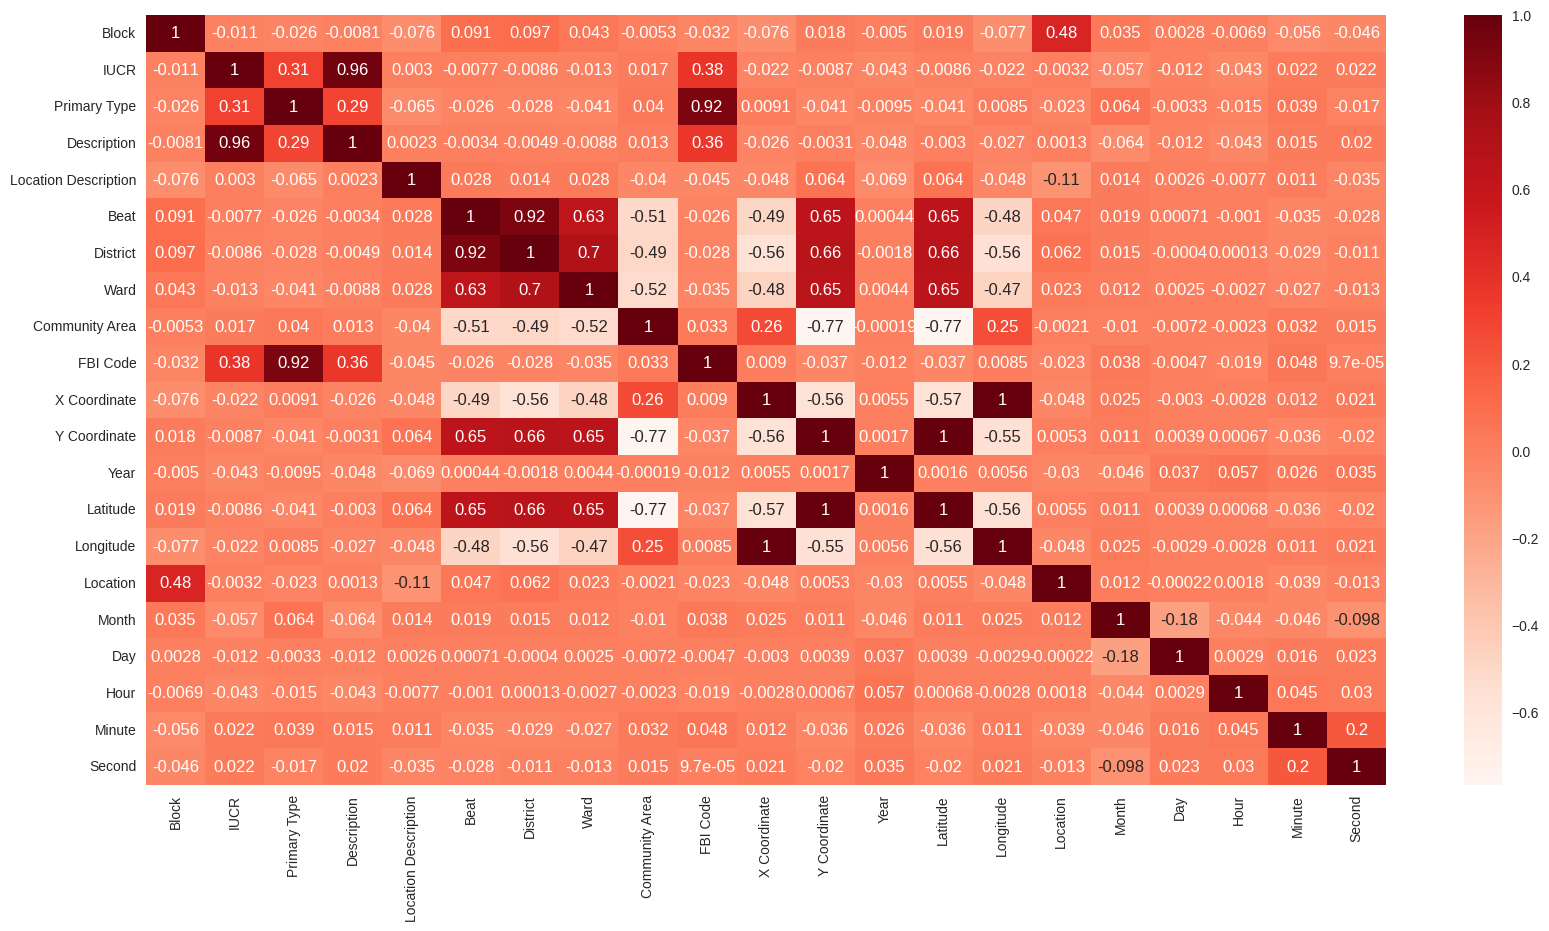

In [ ]:
# Feature Selection using Filter Method
# Split Dataframe to target class and features
X_fs = df.drop(['Primary Type'], axis=1)
Y_fs = df['Primary Type']

#Using Pearson Correlation
plt.figure(figsize=(20,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
#Correlation with output variable
cor_target = abs(cor['Primary Type'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features

IUCR            0.308390
Primary Type    1.000000
Description     0.291493
FBI Code        0.919211
Name: Primary Type, dtype: float64

In [ ]:
# At Current Point, the attributes is select manually based on Feature Selection Part.
Features = ["IUCR", "Description", "FBI Code"]
print('Full Features: ', Features)

Full Features:  ['IUCR', 'Description', 'FBI Code']


In [ ]:
x, y = train_test_split(df,
                        test_size = 0.2,
                        train_size = 0.8,
                        random_state= 3)

x1 = x[Features]    #Features to train
x2 = x[Target]      #Target Class to train
y1 = y[Features]    #Features to test
y2 = y[Target]      #Target Class to test

print('Feature Set Used    : ', Features)
print('Target Class        : ', Target)
print('Training Set Size   : ', x.shape)
print('Test Set Size       : ', y.shape)

Feature Set Used    :  ['IUCR', 'Description', 'FBI Code']
Target Class        :  Primary Type
Training Set Size   :  (80000, 23)
Test Set Size       :  (20000, 23)


In [ ]:
rf_model = RandomForestClassifier(n_estimators=70, # Number of trees
                                  min_samples_split = 30,
                                  bootstrap = True,
                                  max_depth = 50,
                                  min_samples_leaf = 25)

# Model Training
rf_model.fit(X=x1,
             y=x2)

# Prediction
result = rf_model.predict(y[Features])

In [ ]:
# Model Evaluation
ac_sc = accuracy_score(y2, result)
rc_sc = recall_score(y2, result, average="weighted")
pr_sc = precision_score(y2, result, average="weighted")
f1_sc = f1_score(y2, result, average='micro')
confusion_m = confusion_matrix(y2, result)

print("========== Random Forest Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
print(confusion_m)

========== Random Forest Results ==========
Accuracy    :  0.9961
Recall      :  0.9961
Precision   :  0.9961498417799044
F1 Score    :  0.9961
Confusion Matrix: 
[[2572    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0  988    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    0 2015    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    0    0 3993    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    0    0    0   86    0    0    0    0    0    0    0    0    0
     1    0    0]
 [   0    0    0    0    0  673    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    0    0    0    0    0  545    0    0    0    0    0    0    0
     6    0    0]
 [   0    0    0    0    0    0    0  141    0    0    0    4    0    0
     9    0    0]
 [   0    0    0    0    0    0    0    0 3938    0    0    0    0    0
     0    0    0]
 [   0    0    0    0    0 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


================= Classification Report =================

                            precision    recall  f1-score   support

           CRIMINAL DAMAGE       1.00      1.00      1.00      2572
                  BURGLARY       1.00      1.00      1.00       988
                 NARCOTICS       1.00      1.00      1.00      2015
                     THEFT       1.00      1.00      1.00      3993
                  HOMICIDE       1.00      0.99      0.99        87
                   ROBBERY       1.00      1.00      1.00       673
        DECEPTIVE PRACTICE       1.00      0.99      0.99       551
    PUBLIC PEACE VIOLATION       0.91      0.92      0.91       154
                   BATTERY       1.00      1.00      1.00      3938
                   ASSAULT       0.99      1.00      0.99      1186
         CRIMINAL TRESPASS       1.00      1.00      1.00       628
             OTHER OFFENSE       0.99      0.98      0.99      1203
       MOTOR VEHICLE THEFT       1.00      1.00      1.0

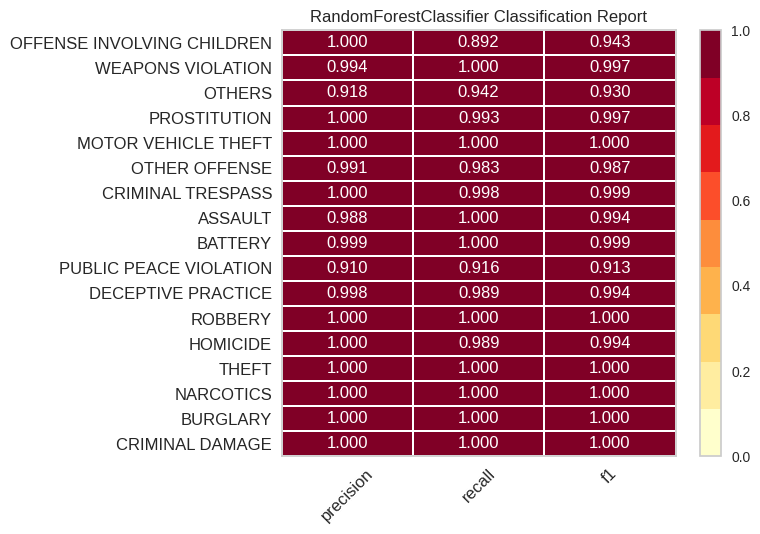

In [ ]:
# Classification Report
# Instantiate the classification model and visualizer
target_names = Classes
visualizer = ClassificationReport(rf_model, classes=target_names)
visualizer.fit(X=x1, y=x2)     # Fit the training data to the visualizer
visualizer.score(y1, y2)       # Evaluate the model on the test data

print('================= Classification Report =================')
print('')
print(classification_report(y2, result, target_names=target_names))

g = visualizer.poof()             # Draw/show/poof the data

In [ ]:
# Neural Network
# Create Model with configuration
nn_model = MLPClassifier(solver='adam',
                         alpha=1e-5,
                         hidden_layer_sizes=(40,),
                         random_state=1,
                         max_iter=1000
                        )

# Model Training
nn_model.fit(X=x1,
             y=x2)

# Prediction
result = nn_model.predict(y[Features])